# Couple model

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Solve and simulate model

In [2]:
tic1 = time.time()
Couple = RetirementClass(couple=True)
tic2 = time.time()
Couple.solve()
tic3 = time.time()
Couple.simulate(tax=True)
tic4 = time.time()
Couple.recompute()
tic5 = time.time()
print('Class     :', round(tic2-tic1,2))
print('Solve     :', round(tic3-tic2,2))
print('Simulate  :', round(tic4-tic3,2))
print('Precompute:', round(tic5-tic4,2))

Class     : 152.98
Solve     : 96.18
Simulate  : 114.33
Precompute: 45.52


In [97]:
tic1 = time.time()
Couple.solve(recompute=True)
tic2 = time.time()
Couple.simulate(tax=True)
tic3 = time.time()
print('Solve     :', round(tic2-tic1,2))
print('Simulate  :', round(tic3-tic2,2))

Solve     : 60.98
Simulate  : 7.92


### Retirement probabilities from solution - Couples

Women

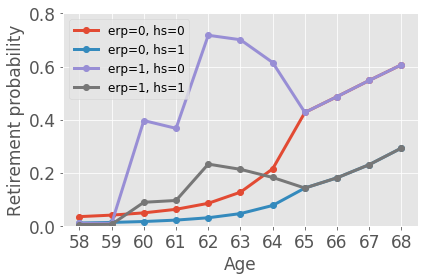

In [4]:
G = figs.choice_probs_c(Couple,ma=0)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,ylim=[0,0.8],linewidth=3).savefig('figs/Model/Couple_ChoiceProb_Women.png')

Men

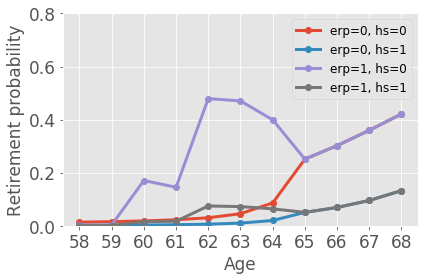

In [8]:
G = figs.choice_probs_c(Couple,ma=1,ad=0)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,ylim=[0,0.8],linewidth=3).savefig('figs/Model/Couple_ChoiceProb_Men.png')

### Simulation

In [98]:
def rename_gender(G_lst):
    G_lst[0]['label'] = ['Women']
    G_lst[1]['label'] = ['Men']

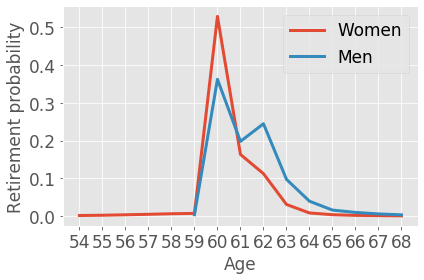

In [100]:
Gw = figs.retirement_probs_c(Couple,ma=0,ages=[54,68])
Gm = figs.retirement_probs_c(Couple,ma=1,ages=[54,68])
rename_gender([Gw,Gm])
figs.MyPlot([Gw,Gm],linewidth=3).savefig('figs/Model/SimCoupleProbs')

### Simulation - Retirement

In [11]:
def rename(G_lst):
    G_lst[0]['label'] = ['High skilled']
    G_lst[1]['label'] = ['Base']
    G_lst[2]['label'] = ['Low skilled']

Women

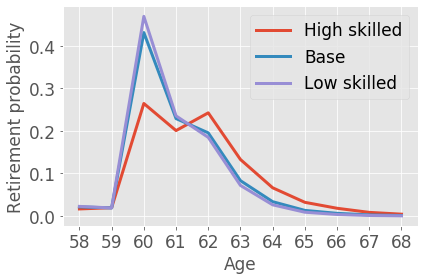

In [12]:
G_hs = figs.retirement_probs_c(Couple,ma=0,ST_w=[1,3])
G_base = figs.retirement_probs_c(Couple,ma=0)
G_ls = figs.retirement_probs_c(Couple,ma=0,ST_w=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

Men

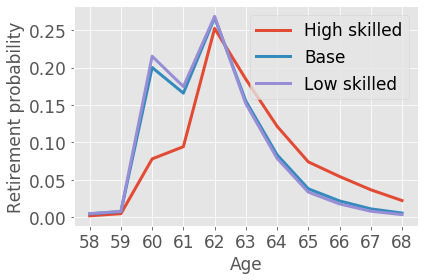

In [13]:
G_hs = figs.retirement_probs_c(Couple,ma=1,ST_h=[1,3])
G_base = figs.retirement_probs_c(Couple,ma=1)
G_ls = figs.retirement_probs_c(Couple,ma=1,ST_h=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Consumption

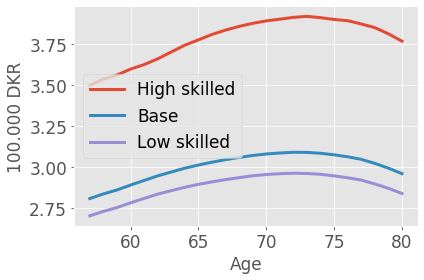

In [14]:
G_hs = figs.lifecycle_c(Couple,var='c',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='c',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='c',ST_w=[0,2],ST_h=[0,2],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Wealth

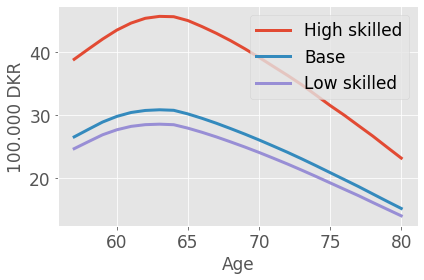

In [15]:
G_hs = figs.lifecycle_c(Couple,var='m',ST_w=[1,3],ST_h=[1,3],ages=[57,80])
G_base = figs.lifecycle_c(Couple,var='m',ages=[57,80])
G_ls = figs.lifecycle_c(Couple,var='m',ST_w=[0,2],ST_h=[0,2],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

# Consumption and value functions

### We consider a household with zero age difference, where both are low skilled and no erp

### d_h=d_w=0

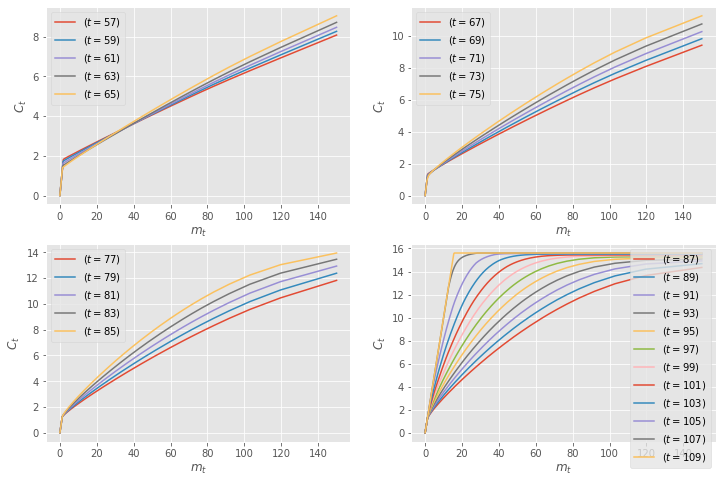

In [20]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(Couple,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,20))
figs.policy_c(Couple,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(20,30))
figs.policy_c(Couple,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(Couple,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

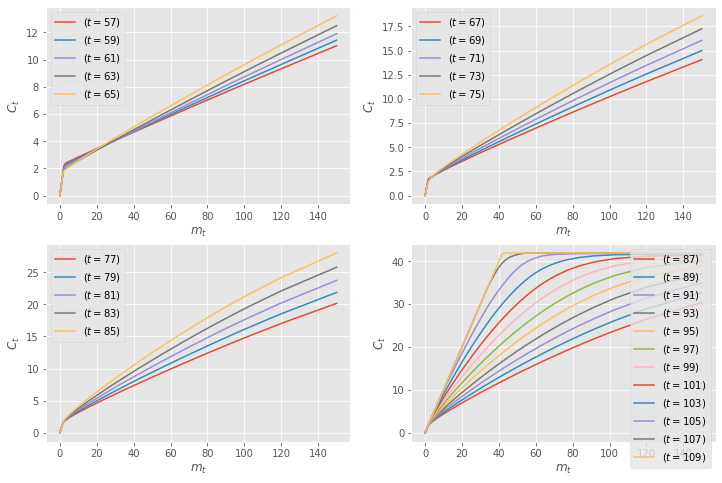

In [21]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(Couple,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,20))
figs.policy_c(Couple,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(20,30))
figs.policy_c(Couple,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(Couple,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

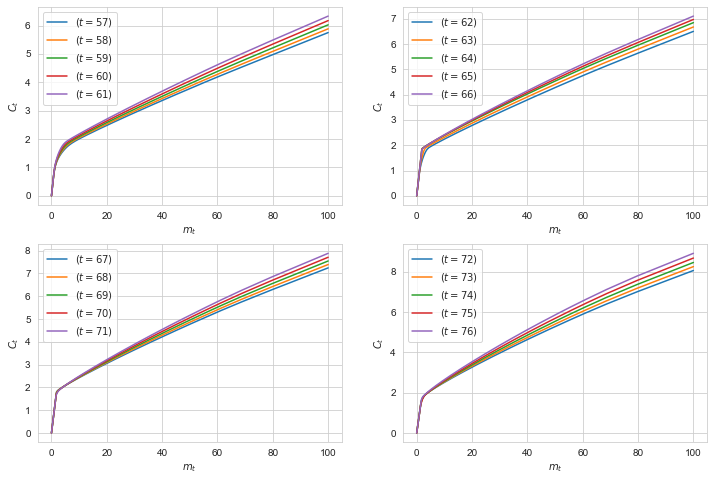

In [42]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = 1 and d_w = 0

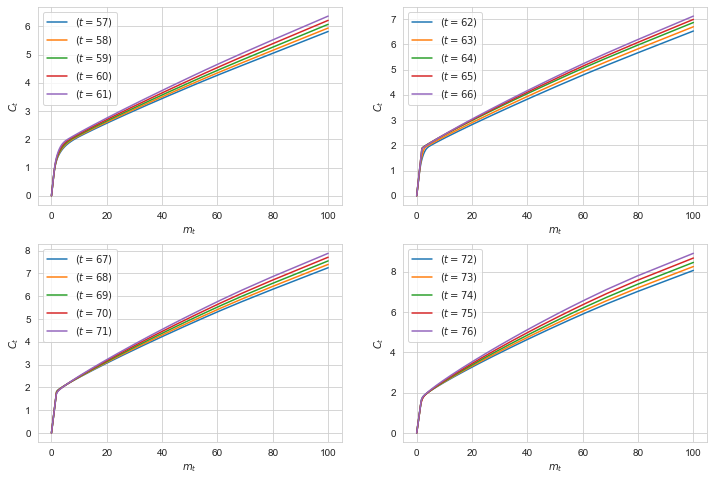

In [43]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
plt.show()

### d_h = d_w = 1

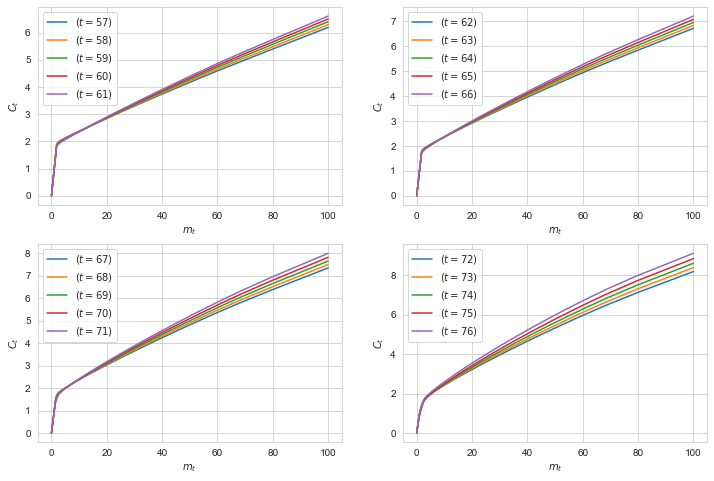

In [27]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

### Now we consider a household with erp and high skilled

### d_h=d_w=0

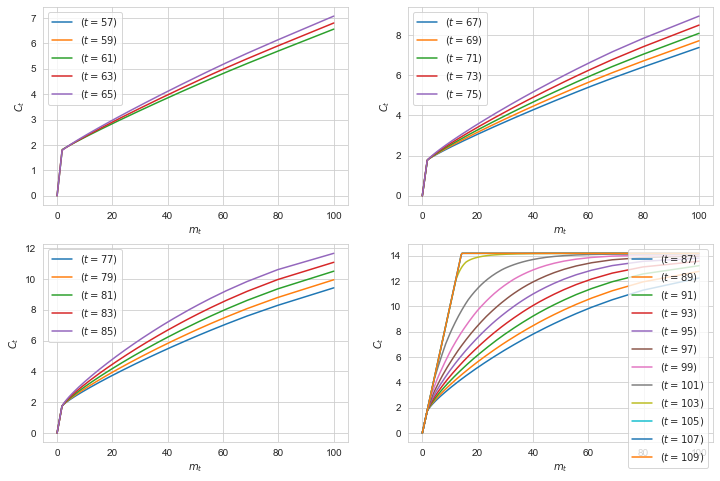

In [30]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

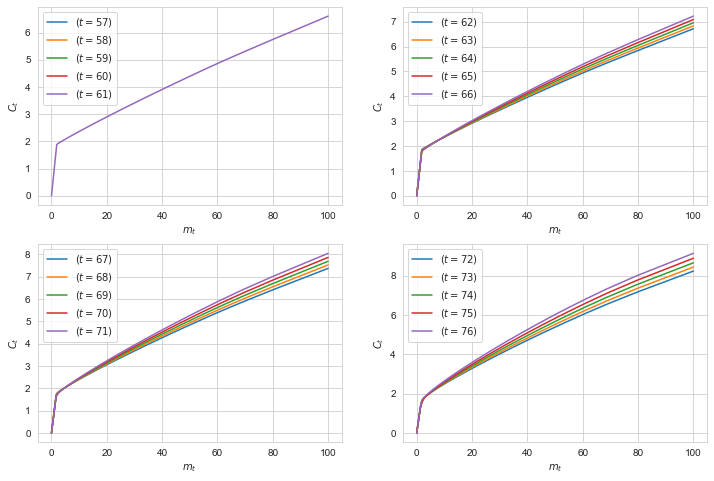

In [31]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = d_w = 1

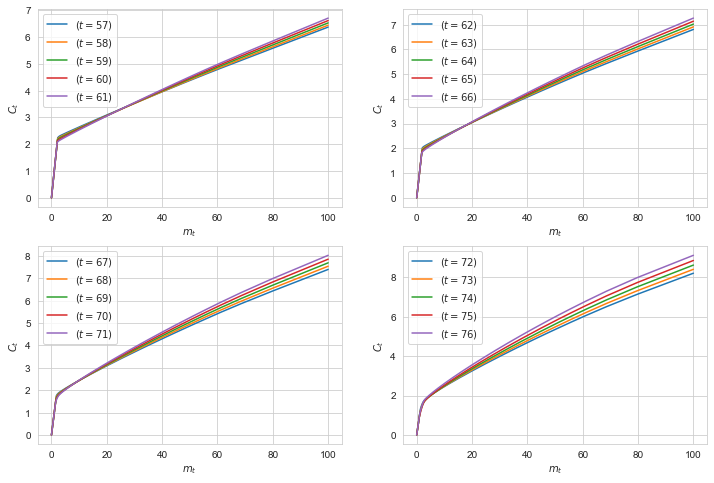

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'])
plt.show()

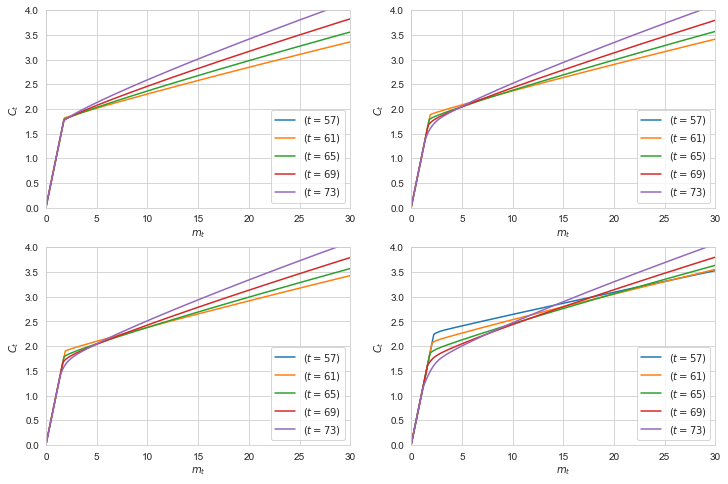

In [34]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[0,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
plt.show()

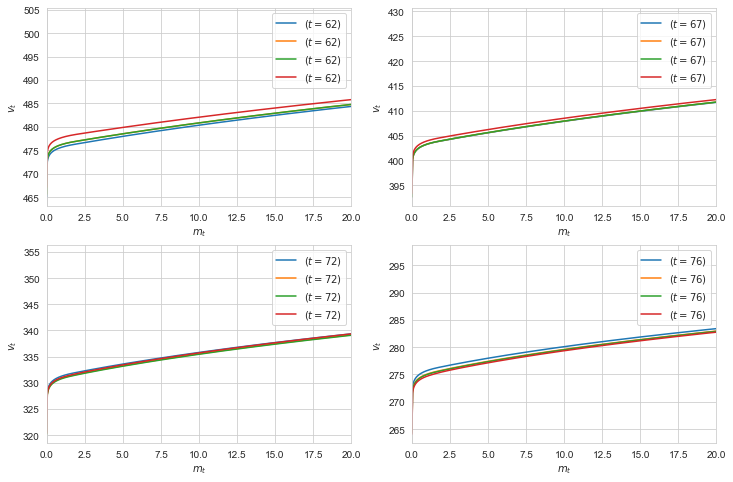

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy_c(test,axs[0,0],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[0,1],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,1],var='v',T=[19],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
plt.show()

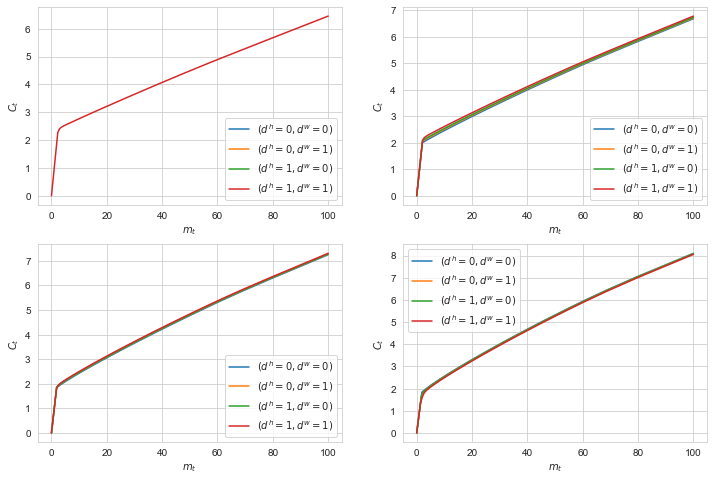

In [18]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='c',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='c',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='c',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

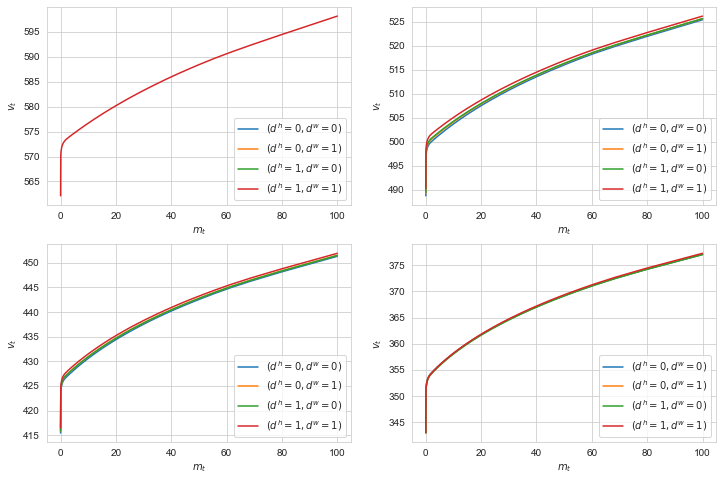

In [19]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()